In [1]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6";


%load_ext autoreload
%autoreload 2
from CW import CW
from FGSM import FGSM
from OPT_attack import OPT_attack
from OPT_attack_polar import OPT_attack_polar
from OPT_attack_polar_GD import OPT_attack_polar_GD
from OPT_attack_lsq import OPT_attack_lsq
from OPT_attack_polar_lsq import OPT_attack_polar_lsq
from OPT_attack_GD import OPT_attack_GD
from OPT_genattack import OPT_genattack
from OPT_attack_sign_SGD import OPT_attack_sign_SGD
from ZOO import ZOO
from OPT_attack_lf import OPT_attack_lf
from nes_attack import NES
from models import PytorchModel
import torch
import torchvision.models as models
from allmodels import MNIST, load_model, load_mnist_data, load_cifar10_data, CIFAR10, IMAGENET, load_imagenet_data
import os
import numpy as np
import matplotlib.pyplot as plt

Loading ImageNet validation dataset.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


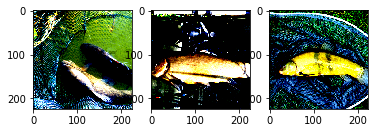

In [2]:
net = models.__dict__["resnet50"](pretrained=True)
net.cuda()
net = torch.nn.DataParallel(net, device_ids=[0])
net.eval()
model = net.module if torch.cuda.is_available() else net
amodel = PytorchModel(model, bounds=[-1,1], num_classes=1000)

train_loader, test_loader, train_dataset, test_dataset = load_imagenet_data()

X0, Y0 = None, None
X1, Y1 = None, None
X2, Y2 = None, None

for i, (xi,yi) in enumerate(test_loader):
    if i==0:
        X0, Y0 = xi, yi
    if i==1:
        X1, Y1 = xi, yi
    if i==4:
        X2, Y2 = xi, yi
    if i==10:
        break

def plot_adv(X, adv):
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(X[0].numpy(), (1, 2, 0)))
    plt.subplot(1,2,2)
    plt.imshow(np.transpose(adv.cpu()[0].numpy(), (1, 2, 0)))
    plt.show()


# Plot the sample images
plt.subplot(1,3,1)
plt.imshow(np.transpose(X0[0].numpy(), (1,2,0)))
plt.subplot(1,3,2)
plt.imshow(np.transpose(X1[0].numpy(), (1, 2, 0)))
plt.subplot(1,3,3)
plt.imshow(np.transpose(X2[0].numpy(), (1, 2, 0)))
plt.show()

In [26]:
x, y = X2, Y2
seed = 10
target = 4

### UNTARGETED

In [ ]:
attack = OPT_attack(amodel)
adv, dist = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv)

Searching for the initial direction on 100 random directions: 
--------> Found distortion 251.4160
--------> Found distortion 242.7940
--------> Found distortion 237.3069
--------> Found distortion 223.4045
--------> Found distortion 201.4230
==========> Found best distortion 201.4230 in 3.9511 seconds using 320 queries
    Time elapsed 0.0002620220184326172 for iteration 0
Iteration   1 distortion 143.5699 num_queries 717
    Time elapsed 7.413844585418701 for iteration 1
    Time elapsed 13.397558450698853 for iteration 2
    Time elapsed 19.188690900802612 for iteration 3
    Time elapsed 25.0248806476593 for iteration 4
    Time elapsed 30.846953630447388 for iteration 5
Iteration   6 distortion 77.9660 num_queries 1910
    Time elapsed 36.68702745437622 for iteration 6
    Time elapsed 42.435126304626465 for iteration 7
    Time elapsed 48.25565004348755 for iteration 8
    Time elapsed 54.04178047180176 for iteration 9
    Time elapsed 59.766032218933105 for iteration 10
Iteratio

    Time elapsed 746.4518601894379 for iteration 127
    Time elapsed 752.3648042678833 for iteration 128
    Time elapsed 758.2051687240601 for iteration 129
    Time elapsed 764.1362934112549 for iteration 130
Iteration 131 distortion 7.4523 num_queries 32528
    Time elapsed 769.9818208217621 for iteration 131
    Time elapsed 775.8964762687683 for iteration 132
    Time elapsed 781.7337446212769 for iteration 133
    Time elapsed 787.6641545295715 for iteration 134
    Time elapsed 793.5256414413452 for iteration 135
Iteration 136 distortion 7.2563 num_queries 33810
    Time elapsed 799.456725358963 for iteration 136
    Time elapsed 805.2990474700928 for iteration 137
    Time elapsed 811.221474647522 for iteration 138
    Time elapsed 817.0634388923645 for iteration 139
    Time elapsed 822.9893293380737 for iteration 140
Iteration 141 distortion 7.0620 num_queries 35081
    Time elapsed 828.8310816287994 for iteration 141
    Time elapsed 834.7498574256897 for iteration 142
    


Adversarial Example Found Successfully: distortion 6.4499 target 116 queries 40127 
Time: 947.0661 seconds


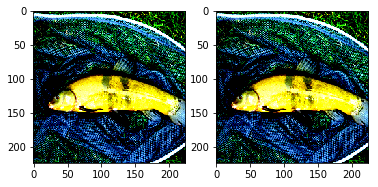

In [27]:
attack = OPT_attack_sign_SGD(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed, query_limit=40000)
plot_adv(x, adv_sign)

In [ ]:
attack = OPT_attack_sign_SGD(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv_sign)

### TARGETED

Targeted attack - Source: 0 and Target: 4 Seed: 10
Searching for the initial direction on 40 samples: 
--------> Found distortion 636.1729
--------> Found distortion 616.3617
--------> Found distortion 431.4885
--------> Found distortion 372.0425
--------> Found distortion 358.7660
==========> Found best distortion 358.7660 in 8.6524 seconds using 409 queries
Iteration  10 distortion 315.8774 num_queries 2485
Iteration  20 distortion 272.5600 num_queries 5041
Iteration  30 distortion 236.1499 num_queries 7649
Iteration  40 distortion 198.6440 num_queries 10849
Iteration  50 distortion 176.1550 num_queries 14129
Iteration  60 distortion 173.8013 num_queries 17925


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration  70 distortion 173.8013 num_queries 25205
Stopping criteria reached

Adversarial Example Found Successfully: distortion 173.8013 target 4 queries 25614 
Time: 340.3647 seconds


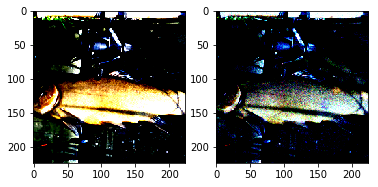

In [7]:
attack = OPT_attack(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

In [21]:
attack = OPT_attack_sign_SGD(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

Targeted attack - Source: 0 and Target: 4
Searching for the initial direction on 100 samples: 
--------> Found distortion 636.1729
--------> Found distortion 616.3617
--------> Found distortion 431.4885
--------> Found distortion 372.0425
--------> Found distortion 358.7660


KeyboardInterrupt: 

Targeted attack - Source: 6 and Target: 4
Searching for the initial direction on 100 samples: 
--------> Found distortion 5.2690
--------> Found distortion 4.2136


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


==========> Found best distortion 4.2136 in 1.7316 seconds using 1140 queries
Iteration   1 distortion 3.6252 num_queries 2012
Iteration   6 distortion 0.6060 num_queries 4729
Iteration  11 distortion 0.3934 num_queries 6035
Iteration  16 distortion 0.3095 num_queries 7480
Iteration  21 distortion 0.2623 num_queries 8815
Iteration  26 distortion 0.2354 num_queries 9993
Iteration  31 distortion 0.2214 num_queries 11234
Success: stopping threshold reached

Adversarial Example Found Successfully: distortion 0.2214 target 4 queries 11234 LS queries 3894 
Time: 16.7447 seconds


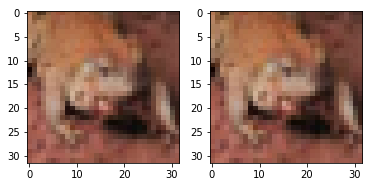

In [19]:
attack = OPT_attack_sign_SGD(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed,
                  svm=True)
plot_adv(x, adv)